In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import linregress

marathon_all = pd.read_csv("Resources/cheat_marathon_master.csv")

marathon_all.head()

,Year,Bib Number,Female Elite,Name,Age,M/F,City,State,Country,5K (S),...,Half (S),25K (S),30K (S),35K (S),40K (S),Pace (S),Official Time (S),Overall,Gender,Division
0,2015,3,False,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883.0,...,3842.0,4567.0,5520.0,6479.0,7359.0,296,7757,1,1,1
1,2015,4,False,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883.0,...,3841.0,4567.0,5519.0,6479.0,7362.0,298,7788,2,2,2
2,2015,8,False,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883.0,...,3842.0,4567.0,5520.0,6479.0,7381.0,299,7822,3,3,3
3,2015,11,False,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,883.0,...,3842.0,4567.0,5520.0,6483.0,7427.0,300,7847,4,4,4
4,2015,10,False,"Korir, Wesley",32,M,Kitale,NaN,KEN,883.0,...,3841.0,4567.0,5520.0,6479.0,7407.0,300,7849,5,5,5


In [2]:
marathon_all['Official Time'] = pd.to_datetime(marathon_all['Official Time (S)'])

marathon_all.sort_values('Official Time (S)')
marathon_all.reset_index

tenth_percentile = stats.scoreatpercentile(marathon_all['Official Time (S)'], 10)
tenth_percentile

# runner_count_all = marathon_all['Year'].count()
# top_10_percent = round(runner_count_all * .10)
top_10_percent_df = marathon_all.loc[marathon_all['Official Time (S)'] <= tenth_percentile, :]

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


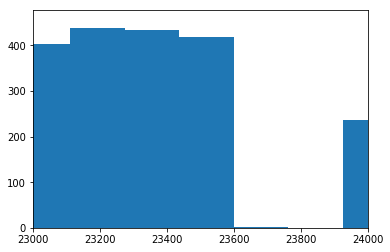

In [3]:
# find where the bib number gaps are between 3rd
# and 4th wave

plt.hist(marathon_all['Bib Number'], bins=200)
plt.xlim(23000, 24000)

marathon_all['Bib Number'] = pd.to_numeric(marathon_all['Bib Number'])

In [4]:
# dataframe without the 4th wave
no_4th_wave_df = marathon_all.loc[marathon_all['Bib Number'] < 23800, :]

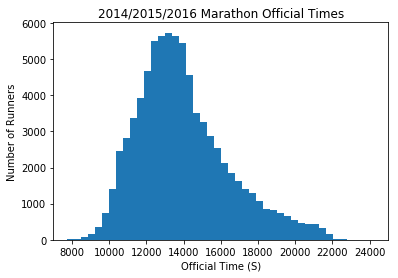

In [5]:
plt.hist(marathon_all['Official Time (S)'], bins=80)
plt.xlim(7000, 25000)
plt.title('2014/2015/2016 Marathon Official Times')
plt.ylabel('Number of Runners')
plt.xlabel('Official Time (S)')
plt.show()

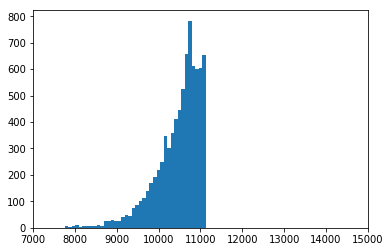

In [6]:
plt.hist(top_10_percent_df['Official Time (S)'], bins = 40)
plt.xlim(7000, 15000)
plt.show()

Text(0.5,0,'Official Time (S)')

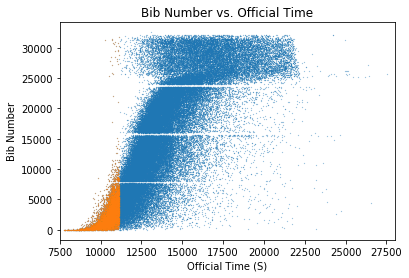

In [7]:
x_data = marathon_all['Official Time (S)']
y_data = marathon_all['Bib Number']

zx_data = top_10_percent_df['Official Time (S)']
zy_data = top_10_percent_df['Bib Number']

plt.scatter(x_data, y_data, s = 0.03)
plt.scatter(zx_data, zy_data, s = 0.03)

plt.xlim(7500, 28000)
plt.title('Bib Number vs. Official Time')
plt.ylabel('Bib Number')
plt.xlabel('Official Time (S)')

In [10]:
### 4TH wave shows no correlation between Bib Number and Official Time.
### Qualifying times for the 4th wave vary wildly so I will ignore 4th wave in the analysis

r-squared: 0.4660830887768662
y = 2.652328079041864x + -22725.0235928372


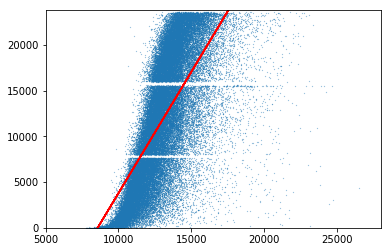

In [38]:
xx_data = no_4th_wave_df['Official Time (S)']
yy_data = no_4th_wave_df['Bib Number']

plt.scatter(xx_data, yy_data, s = 0.03)

plt.xlim(5000, 28000)
plt.ylim(0, 23800)
linregress(xx_data,yy_data)

slope, intercept, r_value, p_value, std_err = stats.linregress(xx_data, yy_data)
print("r-squared:", r_value**2)
print(f'y = {slope}x + {intercept}')
plt.plot(xx_data, intercept + slope*xx_data, 'r', label='fitted line')
plt.show()

In [47]:
x_lin = np.linspace(7500, 22500, 1000)
y_sig = 1 / (1 + math.exp(-x))

p = np.polyfit(x, y, 3)
pv = np.polyval(p, x_lin)

NameError: name 'x' is not defined

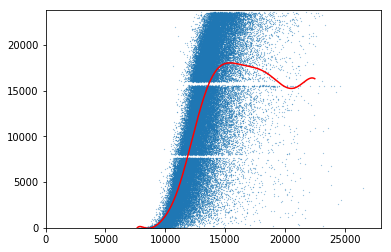

In [45]:
plt.scatter(xx_data, yy_data, s = 0.03)
plt.xlim(0, 28000)
plt.ylim(0, 23800)

p_2 = np.polyfit(xx_data, yy_data, 12)
x_p = np.linspace(7500, 22500, 1000)
y_p = np.polyval(p_2, x_p)
plt.plot(x_p, y_p, '-', color='r')

In [33]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [34]:
ys_data = sigmoid(xx_data)
np.random.seed(1729)
plt.plot(xdata, ysdata, 'b-', label='data')

popt, pcov = curve_fit(sigmoid, xx_data, ys_data)
plt.plot(xdata, func(xdata, *popt))

TypeError: cannot convert the series to <class 'float'>